## PCA(Principle Component Analysis)

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [213]:
data = pd.read_csv('wine.csv')

In [214]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [215]:
data.isnull().sum() #there is no null values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [216]:
data.duplicated().sum() #there are no duplicated columns

0

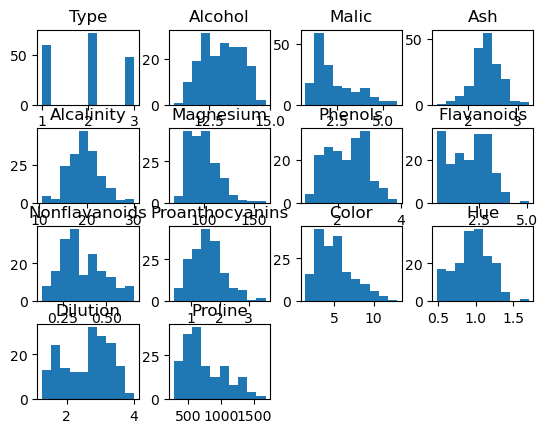

In [217]:
data.hist(grid=False)
plt.show()

The data in the Alcohol column is distributed proper as a normal distribution and the other columns data is also positively skewd and distributed properl

<Axes: >

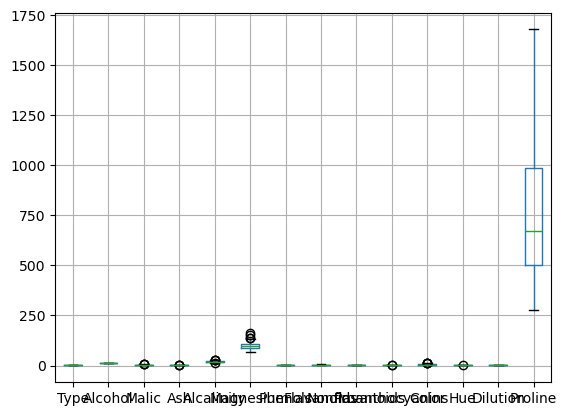

In [218]:
data.boxplot()

there are no much outliers in the data

In [219]:
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


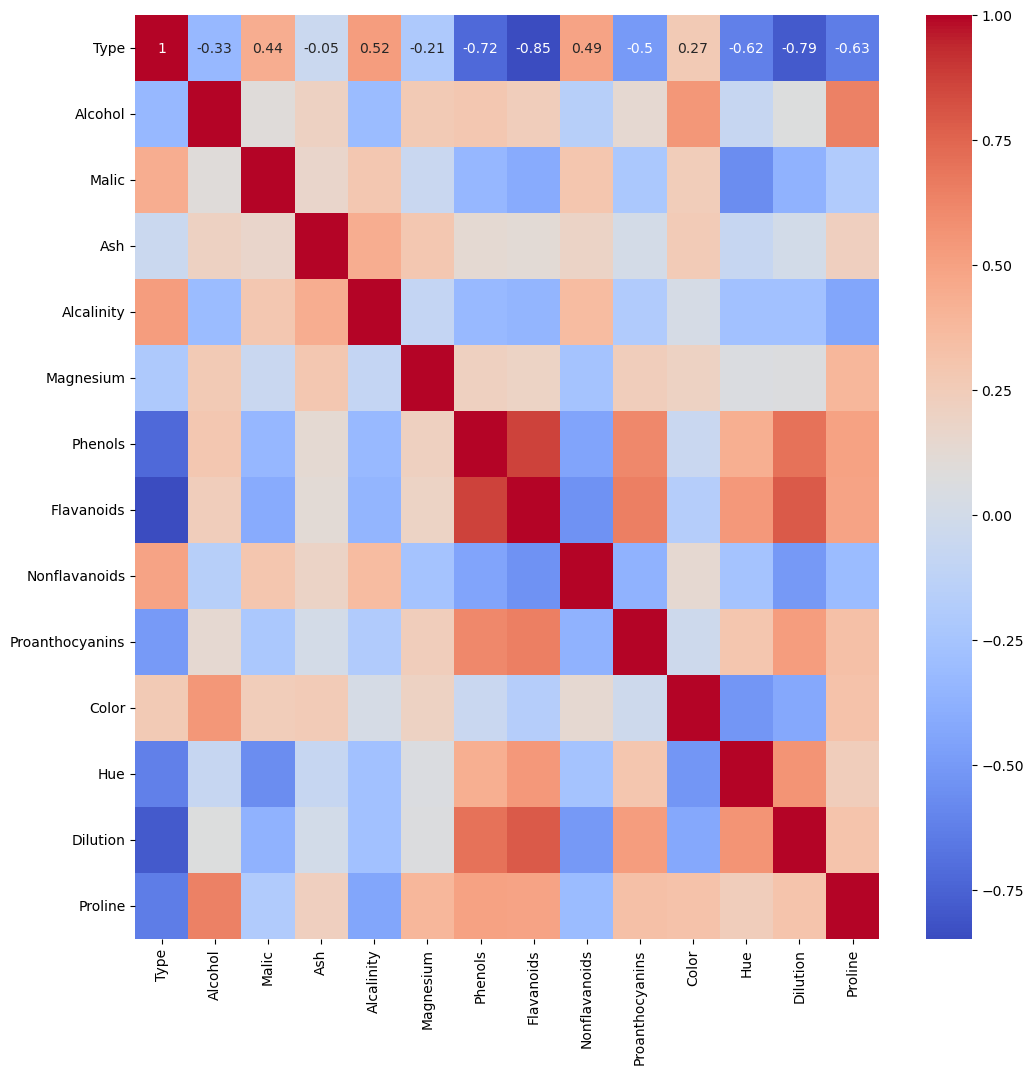

In [220]:
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

## Dimensionlaity Reduction with PCA

as we are doing with the pca we split the data with features and target column

In [221]:
features = data.drop('Type',axis=1)
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [222]:
target = data[['Type']]
np.unique(target)

array([1, 2, 3], dtype=int64)

In [223]:
pca = PCA(n_components=3)
pca.fit(features)

PCA(n_components=3)

In [224]:
features_new= pca.transform(features)

In [225]:
print(features.shape)
print(features_new.shape)

(178, 13)
(178, 3)


In [226]:
features_new = pd.DataFrame(features_new)
features_new

,0,1,2
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


In [227]:
from sklearn.model_selection import GridSearchCV
params = {'n_components':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
grid = GridSearchCV(pca,params)
grid.fit(x_train,y_train)
grid.best_params_

{'n_components': 12}

## Clustering With Original Data

In [228]:
from sklearn.cluster import KMeans

In [229]:
kmeans = KMeans(n_clusters=2)

In [230]:
kmeans.fit(features)

KMeans(n_clusters=2)

In [231]:
cluster = kmeans.fit(features)

In [232]:
cluster.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [233]:
features['cluster'] = cluster.labels_
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [234]:
#to check the performance score here in unsupervised ML the Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(features,cluster.labels_)
#here we got 65% accuracy with the original data

0.6568547938114834

In [235]:
#to the correct optimum value we go for elbow method
cluster.inertia_

4543749.614531862

In [236]:
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

[17592334.389126454, 4543749.614531862, 2370696.6545249037, 1337432.4776436014, 916384.7256154553, 647331.5404876231, 413566.387875284, 323227.24705426674, 270148.0019534499, 219768.49522239415]


Text(0.5, 1.0, 'elbow method')

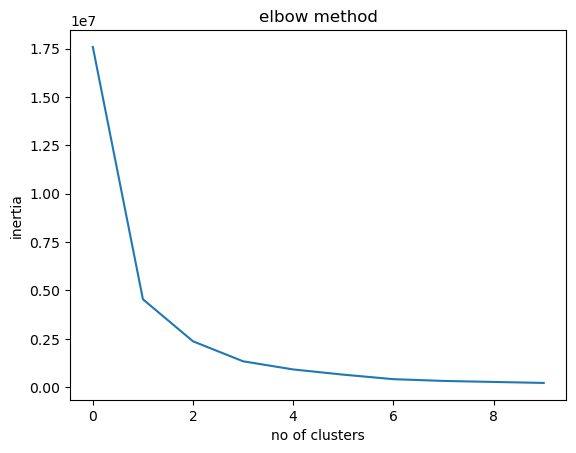

In [237]:
plt.plot(range(10),inertia)
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.title('elbow method')

### Clustering with PCA Data

In [238]:
kmeans1 = KMeans(n_clusters=3)

In [239]:
kmeans1.fit(features_new)

KMeans(n_clusters=3)

In [240]:
cluster1 = kmeans1.fit(features_new)

In [241]:
cluster1.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [242]:
features_new[3] = cluster1.labels_

In [243]:
cluster1.cluster_centers_

array([[-1.84841928e+01,  4.20263004e+00, -4.33492883e-01],
       [ 4.48296775e+02, -2.25699960e+00,  4.67069639e-01],
       [-2.88752586e+02, -2.23889973e+00,  7.13664596e-02]])

In [244]:
#elbow method 
cluster1.inertia_

2369364.376765654

In [245]:
features_new

,0,1,2,3
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,0
...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,0
174,3.131605,2.335191,-4.309931,0
175,88.458074,18.776285,-2.237577,0
176,93.456242,18.670819,-1.788392,0


In [246]:
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_new)
    inertia.append(kmeans.inertia_)
print(inertia)

[17591056.75760533, 4542528.871174475, 2369364.376765654, 1330623.413257388, 915103.8165763781, 646053.3581664107, 410869.2960181052, 321970.1966513043, 268930.37641509215, 223700.65088265648]


Text(0.5, 1.0, 'Elbow method')

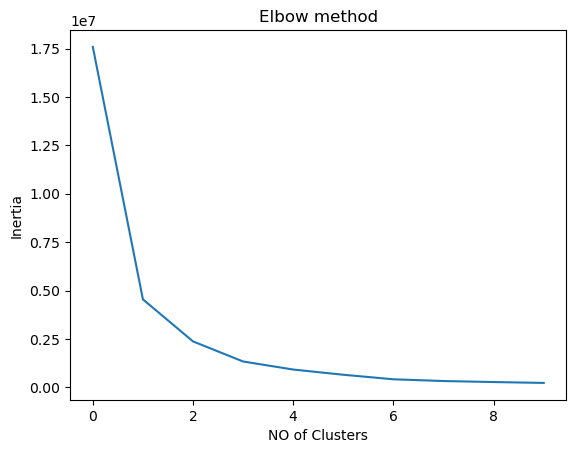

In [247]:
plt.plot(range(10),inertia)
plt.xlabel('NO of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')

In [248]:
silhouette_score(features_new,cluster.labels_)

0.6570098397421859

In [249]:
#here with the PCA with Kmeans we got 65% of performance score

after the reduction of 13 columns to 3 columns we are able to achieve 65% of the score with kmeans and with the original data also we are able to 65% , this show us the power of the PCA with the features reduction 

when you have more features in the data and check of correlation between them and remove is the hectic task for that we can put it to the PCA (principle component analysis) which reduces the dimensionlity of 3d array to 2d and 2d array to 1d with out loosing its valuable data information